## Project No2 - Concentration Theorems

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import matplotlib as mpl

mpl.rcParams["font.size"] = 16

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

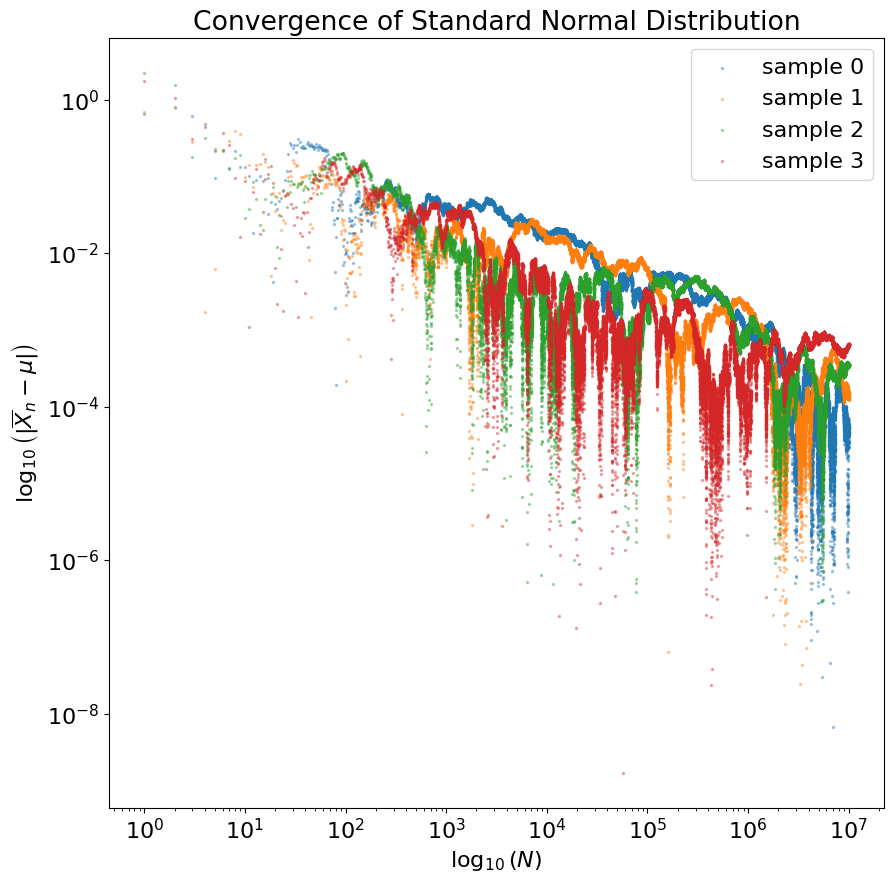

In [28]:
# TO DO CELL
def draw_sample_sequences(n, n_sim, rv: stats.rv_continuous):
    """Draw a random sample of length n n_sim times using the given random state
    function dist using the additional keyword arguments.

    Arguments:
        (int) n: The total number of items in each random sequence
        (int) n_dist: The total number of times to resample
        (stats.rv_continuous) rv: A continious random variable object to sample from.
            May work with discrete rvs, but untested
        (dict) dist_kwargs: Keyword arguments to pass to the dist sampling function

    Returns:
        (np.ndarray, float) An array of float values with shape (n, n_sim) along with
            the true mean of the distribution
    """
    samples = rv.rvs(size=(n, n_sim))
    true_mean = rv.mean()
    return samples, true_mean


def scatter_plot_sample_sequence(
    samples: np.ndarray,
    true_mean: float,
    max_points: int = None,
    fig_kwargs: dict = None,
    title: str = "",
):
    """Helper plotting function to generate a scatter plot for a given set of samples.
    If max_points is not None, then a set of indexes of size max_points is selected
    randomly to scatter.

        Arguments:
            (np.ndarray) samples: The set of randomly sampled points.
            (int) max_points: Maximum number of points to scatter. Default is None which
                includes all points in the scatter plot
            (dict) fig_kwargs: Keyword arguments to pass to the figure
            (str) title: title for the plot

        Returns: TODO
    """
    if not fig_kwargs:
        fig_kwargs = {}
    fig = plt.figure(**fig_kwargs)

    # Choose indexes to scatter
    n = samples.shape[0]
    idxs = np.arange(0, n)
    if max_points:
        probs = 1 / (idxs + 1)
        probs /= probs.sum()
        idxs = np.random.choice(idxs, size=max_points, replace=False, p=probs)

    # Compute average means of each of the samples
    means = np.cumsum(samples, axis=0) / np.tile(np.arange(1, n + 1), reps=(n_sim, 1)).T

    # Iterate over each of the samples
    for i, m in enumerate(means.T):
        plt.scatter(
            np.arange(1, n + 1)[idxs],
            # np.abs(m[idxs] - np.mean(m)),
            np.abs(m[idxs] - true_mean),
            s=2,
            alpha=0.35,
            label=f"sample {i}",
        )

    plt.xscale("log")
    plt.xlabel("$\log_{10}(N)$")
    plt.yscale("log")
    # plt.ylabel("$\log_{10}(| X_n - \\overline{X} |)$")
    plt.ylabel("$\log_{10}\\left(\\left|\overline{X}_n-\mu\\right|\\right)$")
    plt.legend()
    plt.title(title)
    plt.show()


# Set sampling parameters
n = int(1e7)
n_sim = 4

# Sample distribution once
rv = stats.norm(loc=0, scale=1)
samples, true_mean = draw_sample_sequences(n, n_sim, rv)


scatter_plot_sample_sequence(
    samples,
    true_mean,
    max_points=int(5e4),
    fig_kwargs=dict(figsize=(10, 10)),
    title="Convergence of Standard Normal Distribution",
)


#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

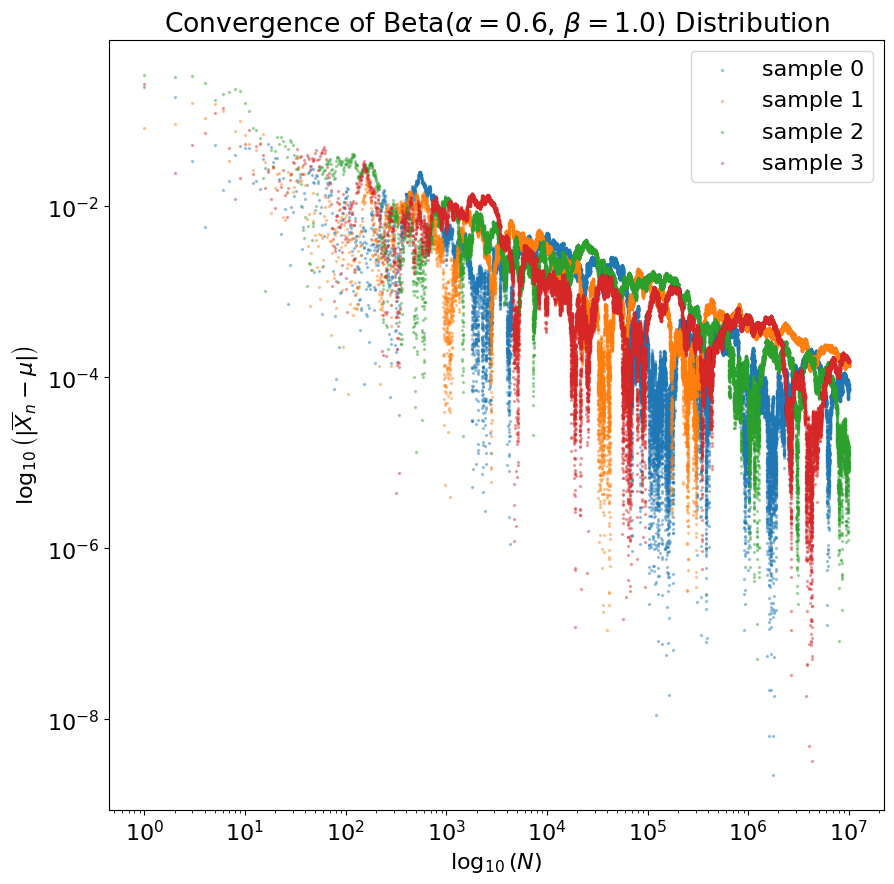

In [29]:
# TO DO CELL

# Set sampling parameters
n = int(1e7)
n_sim = 4

# Sample distribution once
a = 0.6
b = 1.0
rv = stats.beta(a=a, b=b)
samples, true_mean = draw_sample_sequences(n, n_sim, rv)

scatter_plot_sample_sequence(
    samples,
    true_mean,
    max_points=int(5e4),
    fig_kwargs=dict(figsize=(10, 10)),
    title=rf"Convergence of Beta($\alpha={a}$, $\beta={b}$) Distribution",
)


# THIS CELL NEEDS TO BE COMPLETED

**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n - \bar X | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

# CHECK
Are we supposed to compute
$\mathbb P \left( | \bar X_n - \bar X | > \epsilon \right)$ where $\bar X$ is the mean of the given sequence, or are we supposed to compute
$\mathbb P \left( | \bar X_n - \mu | > \epsilon \right)$ where $\mu$ is the true mean of the distribution?

Currently computing $\mathbb P \left( | \bar X_n - \mu | > \epsilon \right)$

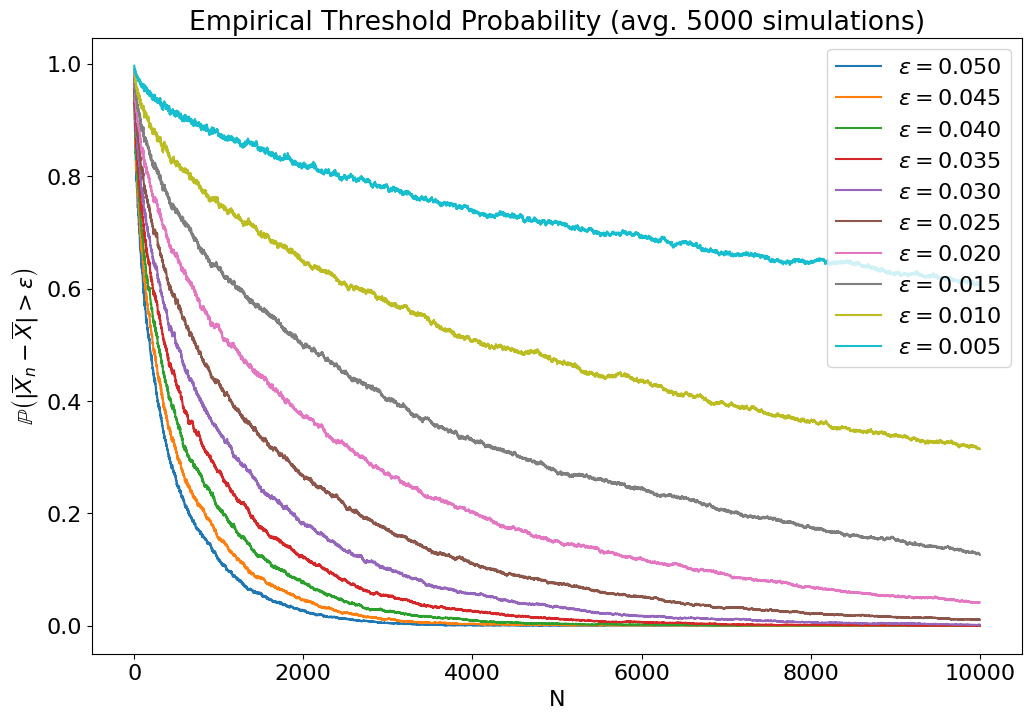

In [30]:
def calc_prob_above_epsilon(samples: np.ndarray, true_mean: float, eps: float) -> np.ndarray:
    """Calculate the probability that the distance from the mean of some set of fixed
    samples is less (greater?) than some fixed value epsilon.

    Arguments:
        (np.ndarray) samples: (n x n_sim) Array of random samples to calculate probability from
        (float) true_mean: The true mean of the given distribution
        (float) eps: The value of epsilon to compare against.

    Returns:
        A np.ndarray with shape (n, ) encoding the probability that the mean at step n
            was less (greater?) than the comparison value epsilon

    """
    # Extract sampling parameters and compute means at each step n
    n, n_sim = samples.shape

    # # The mean of each simulation (row) in samples array (this is X^bar)
    # total_mean = samples.mean(axis=0)

    # The mean in each step in the sequence (X_n)
    mean = np.cumsum(samples, axis=0) / np.tile(np.arange(1, n + 1), reps=(n_sim, 1)).T
    abs_mean = np.abs(mean - true_mean)
    
    # abs_mean = np.abs(mean - total_mean)

    # Do thresholding into True/False array
    abs_mean = abs_mean > eps

    # For each column (group of sequences), count the number of values above threshold
    return np.mean(abs_mean, axis=1)


n = 10000
n_sim = 5000
rv = stats.norm(loc=0, scale=1)
# a = 0.6
# b = 1.0
# rv = stats.beta(a=a, b=b)
samples, true_mean = draw_sample_sequences(n=n, n_sim=n_sim, rv=rv)


plt.figure(figsize=(12, 8))


# epsilon_range = 10 ** np.asarray([-1, -1.4, -1.8, -2.2, -2.6, -3.0], dtype=float)
# epsilon_range = np.asarray([1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3])
# epsilon_range = np.linspace(0.02, 0.002, num=10)
epsilon_range = np.linspace(0.05, 0.005, num=10)
for e in epsilon_range:
    plt.plot(
        np.arange(n) + 1,
        calc_prob_above_epsilon(samples, true_mean, eps=e),
        label=rf"$\epsilon={e:.3f}$",
    )

plt.legend()
plt.xlabel("N")
plt.ylabel(
    "$\mathbb{P}\\left(\\left|\overline{X}_n-\overline{X}\\right|>\epsilon\\right)$"
)
plt.title(f"Empirical Threshold Probability (avg. {n_sim} simulations)")
plt.show()


#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$
At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />

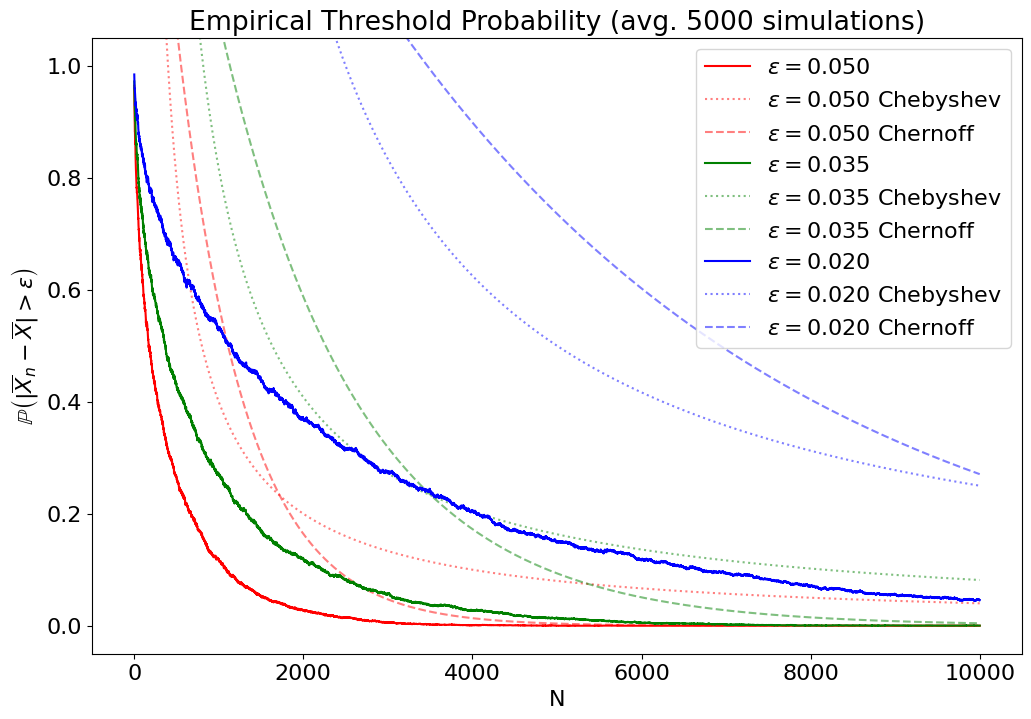

In [31]:
def calc_chebyschev_bound(n: np.ndarray, eps: float) -> np.ndarray:
    """Given a set of n values and value epsilon, calculate the Chebyshev's inequality
    bound for each value of n

    Arguments:
        (np.ndarray) n: Range of n values
        (float) eps: Epsilon used in bound

    Returns:
        (np.ndarray)
    """
    return 1 / (n * eps**2)


def calc_chernoff_bound(n: np.ndarray, eps: float) -> np.ndarray:
    """Given a set of n values and value epsilon, calculate the Chebyshev's inequality
    bound for each value of n

    Arguments:
        (np.ndarray) n: Range of n values
        (float) eps: Epsilon used in bound

    Returns:
        (np.ndarray)
    """
    return 2 * np.exp(-(n * e**2) / 2)



n = 10000
n_sim = 5000
rv = stats.norm(loc=0, scale=1)
# a = 0.6
# b = 1.0
# rv = stats.beta(a=a, b=b)
samples, true_mean = draw_sample_sequences(n=n, n_sim=n_sim, rv=rv)


plt.figure(figsize=(12, 8))


# epsilon_range = 10 ** np.asarray([-1, -1.4, -1.8, -2.2, -2.6, -3.0], dtype=float)
# epsilon_range = np.asarray([1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3])
# epsilon_range = np.linspace(0.02, 0.002, num=10)
epsilon_range = np.linspace(0.05, 0.02, num=3)
colors = ["red", "green", "blue"]
for e, c in zip(epsilon_range, colors):
    _n = np.arange(n) + 1
    
    # Empirical probabilities
    plt.plot(
        _n,
        calc_prob_above_epsilon(samples, true_mean, eps=e),
        label=rf"$\epsilon={e:.3f}$",
        color=c
    )

    # Inequality bounds
    plt.plot(_n, calc_chebyschev_bound(_n, e), color=c, alpha=0.5, linestyle=":", label=rf"$\epsilon={e:.3f}$ Chebyshev")
    plt.plot(_n, calc_chernoff_bound(_n, e), color=c, alpha=0.5, linestyle="--", label=rf"$\epsilon={e:.3f}$ Chernoff")

plt.legend()
plt.xlabel("N")
plt.ylabel(
    "$\mathbb{P}\\left(\\left|\overline{X}_n-\overline{X}\\right|>\epsilon\\right)$"
)
plt.ylim((-0.05, 1.05))
plt.title(f"Empirical Threshold Probability (avg. {n_sim} simulations)")
plt.show()


### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

Mean:  4.0
Std :  2.8284271247461903


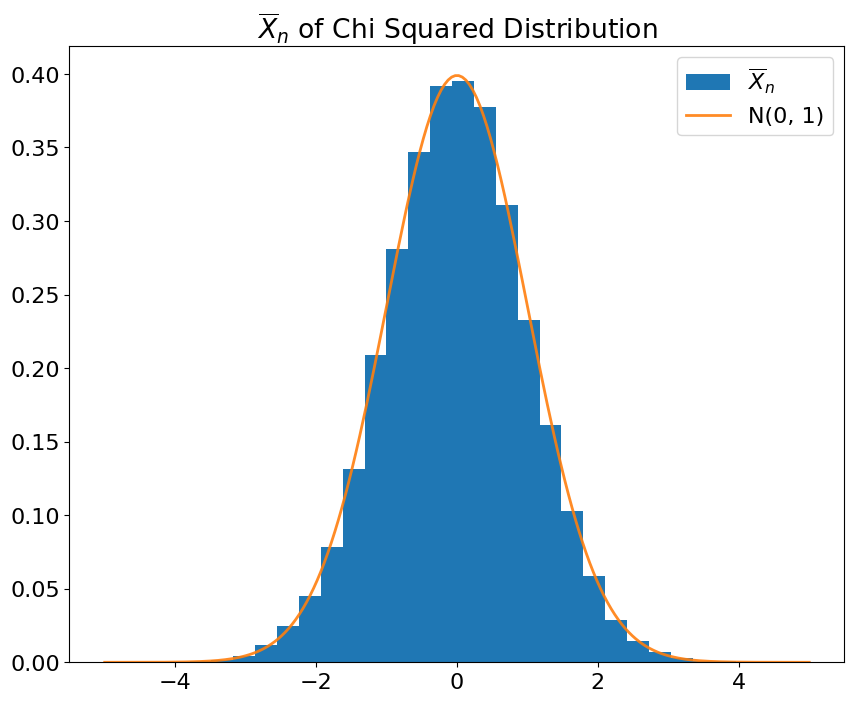

In [32]:
# Create a negative binomial random variable object from scipy.stats
# rv = stats.nbinom(n=8, p=0.3)
rv = stats.chi2(4)
mu = rv.mean()
sigma = rv.std()
print("Mean: ", mu)
print("Std : ", sigma)

n = 4000
n_sim = 25000
samples, _ = draw_sample_sequences(n=n, n_sim=n_sim, rv=rv)
means = np.mean(samples, axis=0)

# Transform sample means into the normal approximation
adj_means = np.sqrt(n) * (means - mu) / sigma

# Plotting functions
x = np.linspace(-5, 5, num=200)
y = stats.norm(loc=0, scale=1).pdf(x)

n_bins = 25
plt.figure(figsize=(10, 8))
plt.hist(adj_means, bins=n_bins, density=True, label="$\overline{X}_n$")
# ks = [1000, 5000, 25000]
# plt.hist([adj_means[:k] for k in ks], bins=n_bins, density=True, alpha=0.9, label=[f"{k} simulations" for k in ks])
    
plt.plot(x, y, label="N(0, 1)", linewidth=2, alpha=0.9)
plt.legend()
plt.title(f"$\overline{{X}}_n$ of Chi Squared Distribution")
plt.show()

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


Mean:  4.0
Std :  2.8284271247461903


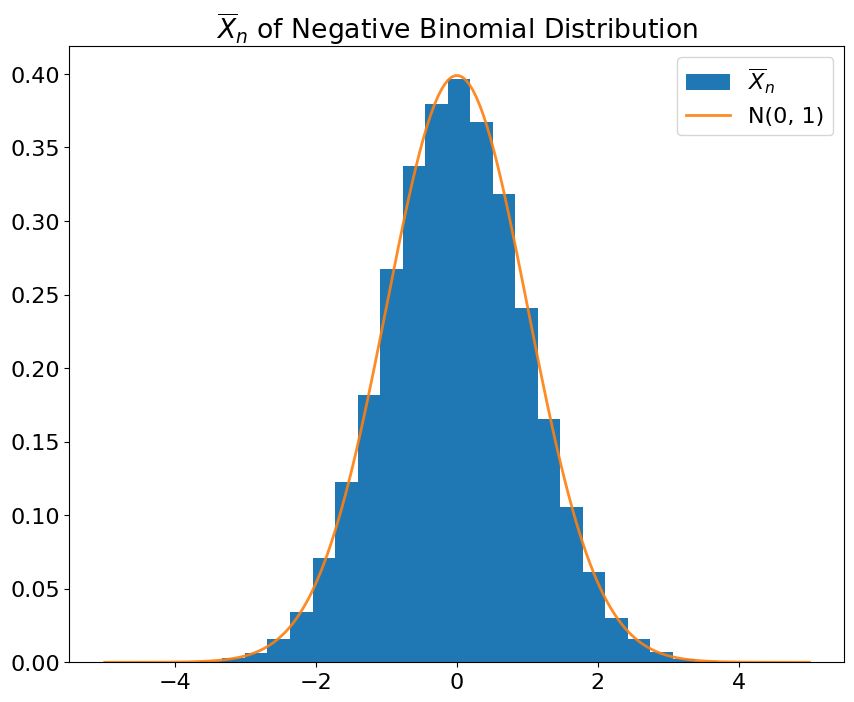

In [33]:
# Create a negative binomial random variable object from scipy.stats
# rv = stats.nbinom(n=8, p=0.3)
mu = rv.mean()
sigma = rv.std()
print("Mean: ", mu)
print("Std : ", sigma)

n = 4000
n_sim = 25000
samples, _ = draw_sample_sequences(n=n, n_sim=n_sim, rv=rv)
means = np.mean(samples, axis=0)

# Transform sample means into the normal approximation
adj_means = np.sqrt(n) * (means - mu) / sigma

# Plotting functions
x = np.linspace(-5, 5, num=200)
y = stats.norm(loc=0, scale=1).pdf(x)

n_bins = 25
plt.figure(figsize=(10, 8))
plt.hist(adj_means, bins=n_bins, density=True, label="$\overline{X}_n$")
# ks = [1000, 5000, 25000]
# plt.hist([adj_means[:k] for k in ks], bins=n_bins, density=True, alpha=0.9, label=[f"{k} simulations" for k in ks])
    
plt.plot(x, y, label="N(0, 1)", linewidth=2, alpha=0.9)
plt.legend()
plt.title(f"$\overline{{X}}_n$ of Negative Binomial Distribution")
plt.show()

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: